# H20ceans: Data Analysis and Machine Learning
### Using Google's AutoML API to track and predict keynote species.

#### Project Description:
Our project utilizes the Pandas Python library for dataset analysis and Google AutoML Cloud API for creating a machine learning model. The project is to be a website that allows for user-friendly analysis of data provided by the Multi-Agency Rocky Intertidal Network (MARINe). In addition, we implemented a machine learning algorithm using AutoML by Google to make predictions about the populations of an indicator species from inputs describing the conditions for the input data.

The main objective of this project was to gain familiarity with commonly used libraries and practices for the discipline we are all passionate about pursuing in the future. This was our entire groups introduction to GitHub collaboration, Pandas Python library, Matplotlib Python library, collecting and citing data from trusted sources, implementing an API, and participating in a Hackathon project.

#### Data Source:
This study utilized data collected by the Multi-Agency Rocky Intertidal Network (MARINe): a long-term ecological consortium funded and supported by many groups. Please visit pacificrockyintertidal.org for a complete list of the MARINe partners responsible for monitoring and funding these data. Data management has been primarily supported by BOEM (Bureau of Ocean Energy Management), NPS (National Parks Service), The David & Lucile Packard Foundation, and United States Navy.

marine.ucsc.edu (2019). Temperature Data | MARINe. [online] Available at: /explore-the-data/temperature/ [Accessed 18 January. 2019].

marine.ucsc.edu (2019). Long-Term Monitoring Surveys | MARINe. [online] Available at: /methods/longterm-methods [Accessed 18 January. 2019].

#### Analyzing first dataset: Marine Site Temperatures
Imports, creates, and visualizes dataframe from given csv file. Used to plot the mean temperature for each year the data was collected. This varies dependent on the location.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#reads in temp file
df = pd.read_csv("daily_temperature_means_PST.csv")

### Creates a new subset of the original data frame based on the location where the data was taken from.

In [9]:
#new df for one location
temp = df[df['marine_site_name'] == "Sage Rock"]

In [10]:
#list of unique years
yearList = temp['year'].unique()

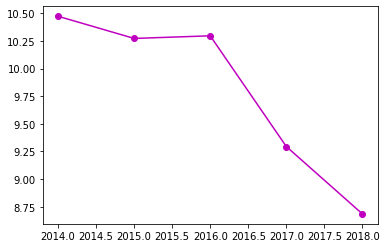

In [12]:
meanList = []
#loop to create graph data
for x in yearList:
    newdf = temp[temp['year'] == x]
    tempMean = newdf['mean'].mean()
    meanList.append(tempMean)
plt.plot(yearList, meanList, marker = "o", color = "m")